In [24]:
import gundam as gun
from astropy.table import Table

In [25]:
galf  = "../data/RAND.fits"  # Galaxy sample
ranf  = "../data/RAND.fits"  # Random sample
outfn = "../data/ex_pcf_01"  # Name for output files

In [26]:

def test_example_pcf():
    par = gun.packpars(kind="pcf", file=galf, file1=ranf, outfn=outfn)
    par.autogrid = True  # Automatic SK grid size
    par.mxh1 = 20  # SK size in dec
    par.mxh2 = 100  # SK size in ra
    par.mxh3 = 10  # SK size in z
    par.nsepp = 28  # Number of bins of projected separation rp
    par.seppmin = 0.02  # Minimum rp in Mpc/h
    par.dsepp = 0.12  # Bin size of rp (in log space)
    par.nsepv = 1  # Number of bins of LOS separation pi
    par.dsepv = 40.0  # Bin size of pi (in linear space)
    par.doboot = True  # Do bootstrap error estimates
    par.omegam = 0.25  # Omega matter
    par.omegal = 0.75  # Omega lambda
    par.h0 = 100  # Hubble constant [km/s/Mpc]
    par.calcdist = True  # Calculate comov. dist.
    par.estimator = "LS"  # Choose Landy-Szalay estimator for the PCF
    par.description = "example01"  # Description label

    # READ DATA FILES  ============================================================
    print("Reading file: ", galf)
    gals = Table.read(galf)
    if "wei" not in gals.colnames:
        gals["wei"] = 1.0  # If not present, set weights to 1

    print("Reading file: ", ranf)
    rans = Table.read(ranf)
    if "wei" not in rans.colnames:
        rans["wei"] = 1.0  # If not present, set weights to 1

    # ==============================================================================
    # CALCULATE THE CORRELATION
    nt = 4  # Threads to use
    cnt = gun.pcf(gals, rans, par, nthreads=nt, plot=True, write=True)
    print(cnt)
    # ==============================================================================


Reading file:  ../data/DATA.fits
Reading file:  ../data/RAND.fits
START!   06/26/24  11:55:19
Name of output set to : ../data/ex_pcf_01
Calling Information  ================================================
table        = ../data/DATA.fits
table_nrows  = 84383
table1       = ../data/RAND.fits
table1_nrows = 227336
nthreads     = 4
write        = True
plot         = True
Comov_dist_tab compute time (s) : 0.157
Comov_dist_tab1 compute time (s) : 0.233
Sample boundaries : (0.00000, 360.00000, -3.75118, 70.25317, 59.69369, 198.16163)
Sample seems to cross RA=0 : False
SK Autogrid                 : ON
SK cell target density      : 8.000
SK cell target density      : 18.000
SK grid size [dec,ra,dcom]  : [17, 478, 3]
SK grid1 size [dec,ra,dcom] : [27, 358, 3]
Pixsort time (s)            : 0.183
SK-LL tables build time (s) : 0.025
====  Counting DD pairs in 17 DEC strips  =====
      [for progress updates check ../data/ex_pcf_01.fortran.log]
  
====  Counting DD pairs in  17 DEC strips  ====
  

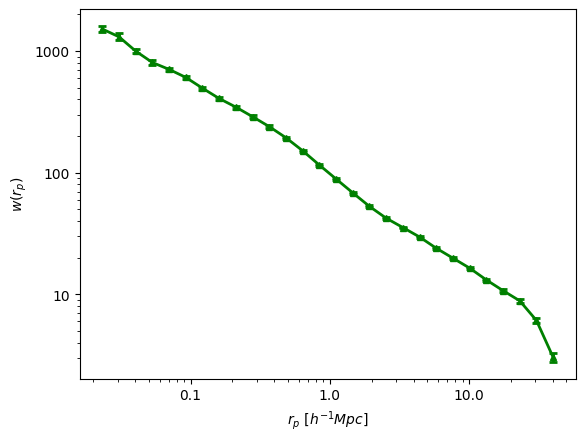

In [27]:
test_example_pcf()